In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
print('Set-up os')

Set-up os


# Import Train and Test Data

In [2]:
# path = '/content'
dog_train = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/DogTrain')
dog_test = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/DogTest')

train = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Train')
test = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Test')


coyote_train = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/CoyoteTrain')
coyote_test = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/CoyoteTest')


dog_train_fnames = os.listdir(dog_train)
print('Dog Train', dog_train_fnames[:5])

dog_test_fnames = os.listdir(dog_test)
print('Dog Test', dog_test_fnames[:5])

coyote_train_fnames = os.listdir(coyote_train)
print('Coyote Train', coyote_train_fnames[:5])

coyote_test_fnames = os.listdir(coyote_test)
print('Coyote test', coyote_test_fnames[:5])

test_fnames = os.listdir(test)
print('Test', test_fnames[:5])

train_fnames = os.listdir(train)
print('Train', train_fnames[:5])

Dog Train ['dog.14.jpg', 'dog.16.jpg', 'dog.23.jpg', 'dog.24.jpg', 'dog.25.jpg']
Dog Test ['dog.102.jpg', 'dog.104.jpg', 'dog.111.jpg', 'dog.113.jpg']
Coyote Train ['coyote.0.jpg', 'coyote.14.jpg', 'coyote.17.jpg', 'coyote.19.jpg', 'coyote.2.jpg']
Coyote test ['coyote.49.jpg', 'coyote.53.jpg', 'coyote.56.jpg', 'coyote.57.jpg']
Test ['coyote', 'dog']
Train ['coyote', 'dog']


In [3]:
print(f'Total number of train dogs is {len(os.listdir(train))}')

Total number of train dogs is 2


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

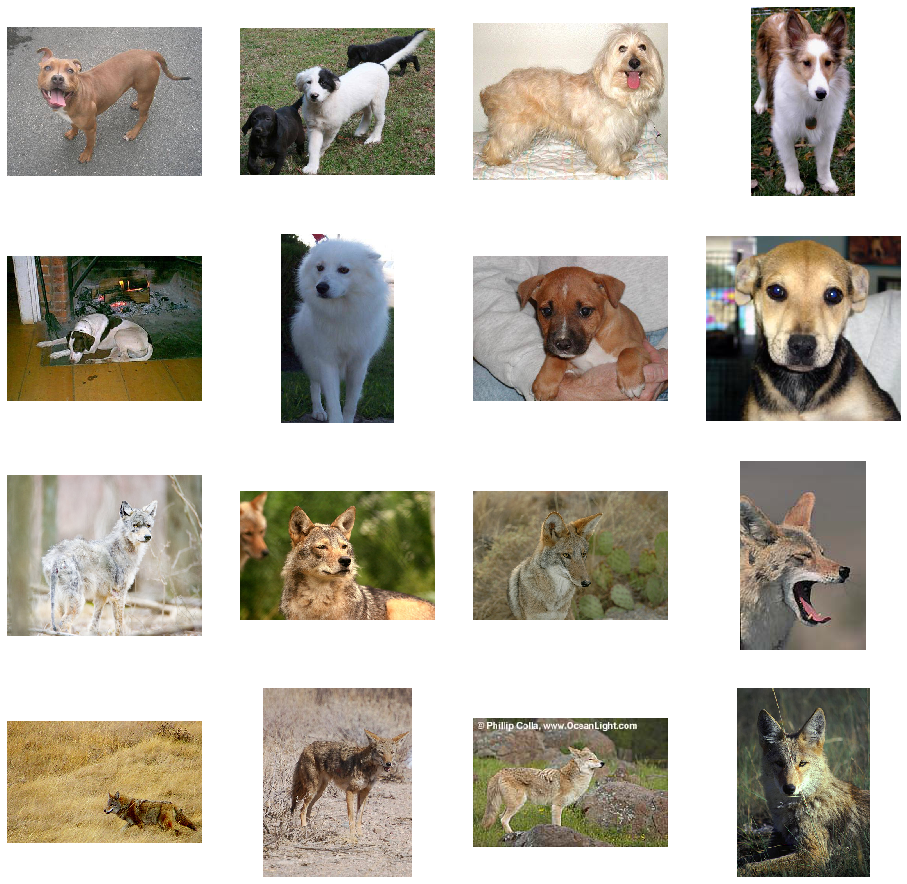

In [17]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(dog_train, fname) 
                for fname in dog_train_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(coyote_train, fname) 
                for fname in coyote_train_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Begining of the model training

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1074 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 70s - loss: 0.8019 - acc: 0.6344 - val_loss: 0.5682 - val_acc: 0.7606
Epoch 2/15
100/100 - 61s - loss: 0.5494 - acc: 0.7384 - val_loss: 0.4963 - val_acc: 0.8083
Epoch 3/15
100/100 - 64s - loss: 0.4068 - acc: 0.8275 - val_loss: 0.4712 - val_acc: 0.8136
Epoch 4/15
100/100 - 61s - loss: 0.3088 - acc: 0.8878 - val_loss: 0.5927 - val_acc: 0.7850
Epoch 5/15
100/100 - 69s - loss: 0.2164 - acc: 0.9245 - val_loss: 0.6475 - val_acc: 0.6981
Epoch 6/15
100/100 - 61s - loss: 0.1531 - acc: 0.9572 - val_loss: 0.8221 - val_acc: 0.8030
Epoch 7/15
100/100 - 65s - loss: 0.1263 - acc: 0.9689 - val_loss: 0.7922 - val_acc: 0.8231
Epoch 8/15
100/100 - 59s - loss: 0.1065 - acc: 0.9703 - val_loss: 1.0519 - val_acc: 0.7733
Epoch 9/15
100/100 - 67s - loss: 0.0536 - acc: 0.9879 - val_loss: 1.7307 - val_acc: 0.7627
Epoch 10/15
100/100 - 60s - loss: 0.0817 - acc: 0.9819 - val_loss: 1.2324 - val_acc: 0.7977
Epoch 11/15
1

C:\Users\lmnop\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


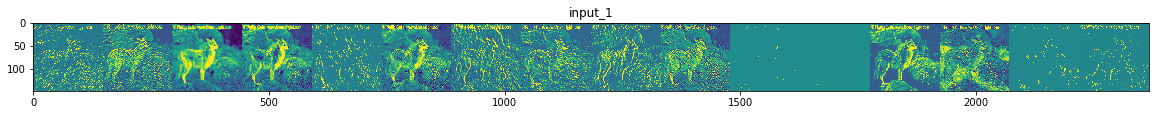

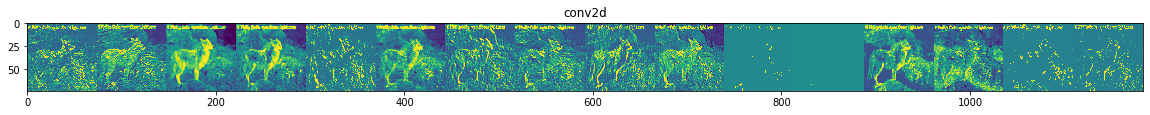

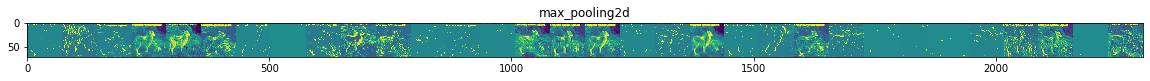

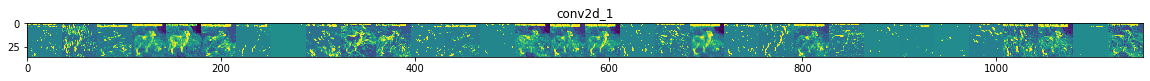

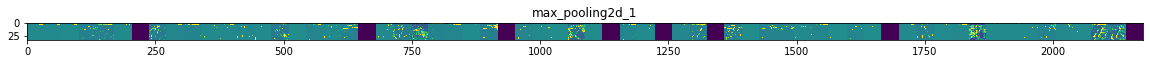

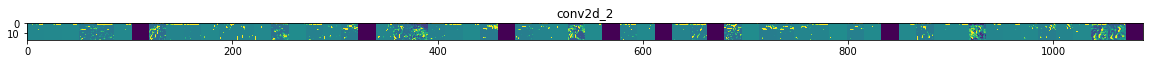

In [12]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(dog_train, f) for f in dog_train_fnames]
dog_img_files = [os.path.join(coyote_train, f) for f in coyote_train_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Model validation and evaluation

Text(0.5, 1.0, 'Training and validation loss')

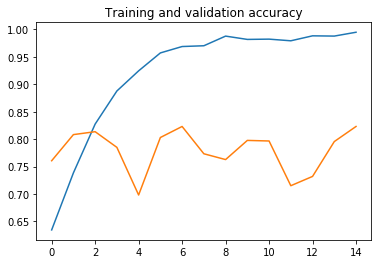

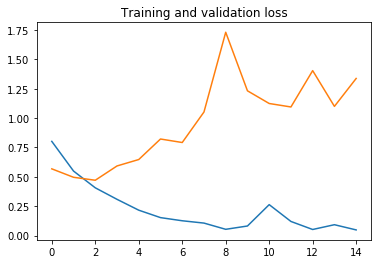

In [13]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Prevent Overfitting

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [17]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train,
                                               shuffle=True,
                                               target_size=(150, 150))

Found 1074 images belonging to 2 classes.


In [29]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

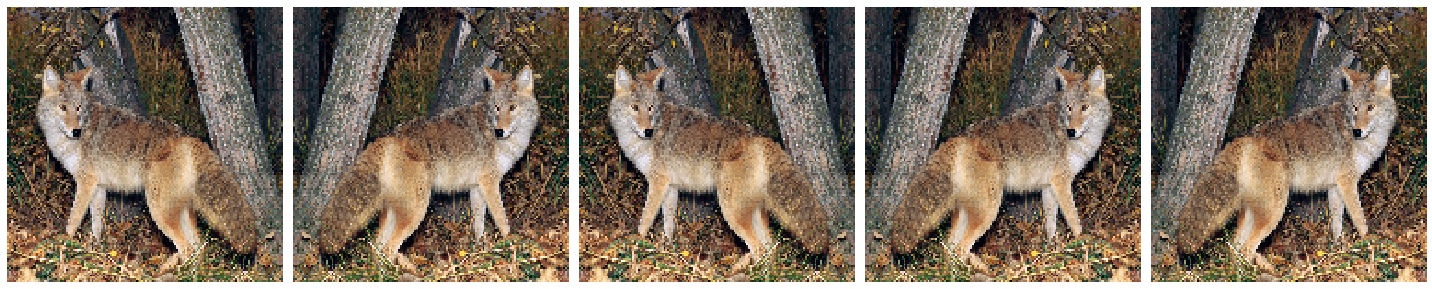

In [31]:
plotImages(augmented_images)

In [35]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [36]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train,
                                               shuffle=True,
                                               target_size=(150, 150))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1074 images belonging to 2 classes.


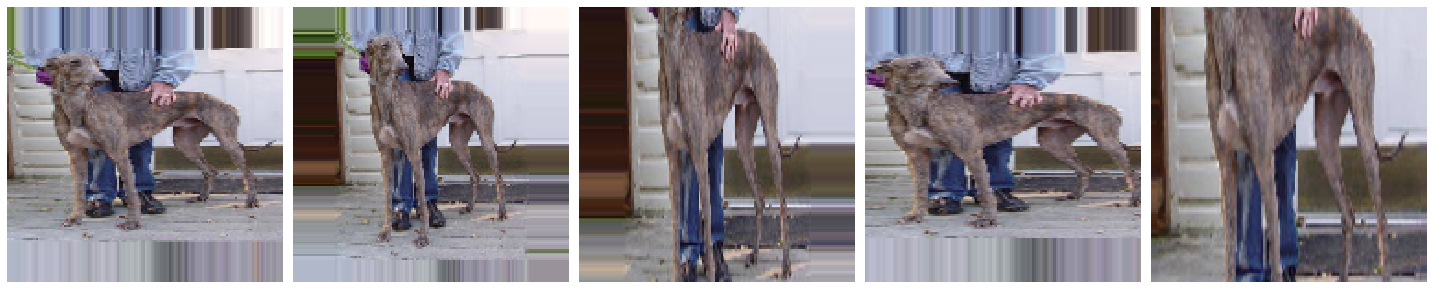

In [37]:
plotImages(augmented_images)

In [38]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [39]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=128,
                                                     directory=train,
                                                     shuffle=True,
                                                     target_size=(150, 150),
                                                     class_mode='binary')

Found 1074 images belonging to 2 classes.


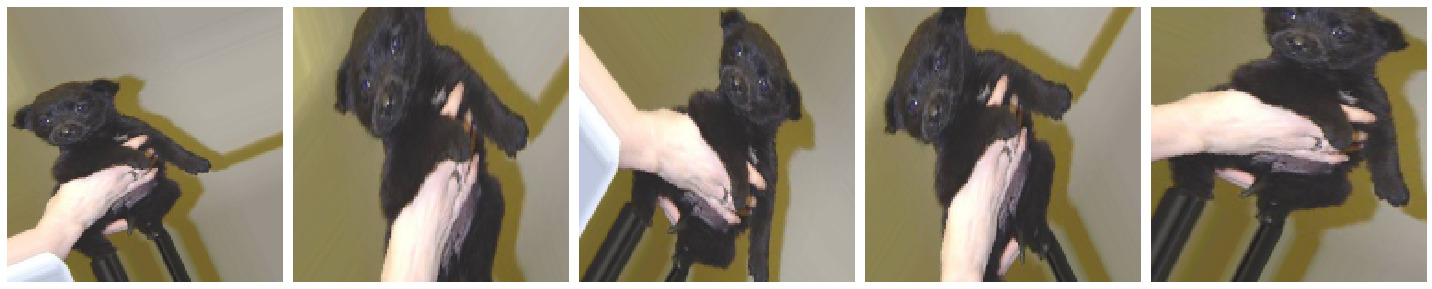

In [40]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [41]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [42]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=128,
                                                 directory=test,
                                                 target_size=(150, 150),
                                                 class_mode='binary')

Found 113 images belonging to 2 classes.


In [59]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [61]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [62]:
history = model_new.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 56s - loss: 0.8273 - accuracy: 0.4713 - val_loss: 0.6848 - val_accuracy: 0.5085
Epoch 2/15
100/100 - 63s - loss: 0.5466 - accuracy: 0.6997 - val_loss: 0.5681 - val_accuracy: 0.6578
Epoch 3/15
100/100 - 61s - loss: 0.3884 - accuracy: 0.8214 - val_loss: 0.4319 - val_accuracy: 0.7447
Epoch 4/15
100/100 - 59s - loss: 0.2940 - accuracy: 0.8737 - val_loss: 0.4307 - val_accuracy: 0.7511
Epoch 5/15
100/100 - 66s - loss: 0.2021 - accuracy: 0.9152 - val_loss: 0.4373 - val_accuracy: 0.7924
Epoch 6/15
100/100 - 63s - loss: 0.1339 - accuracy: 0.9487 - val_loss: 0.3974 - val_accuracy: 0.8432
Epoch 7/15
100/100 - 60s - loss: 0.1125 - accuracy: 0.9542 - val_loss: 0.5797 - val_accuracy: 0.8273
Epoch 8/15
100/100 - 62s - loss: 0.0684 - accuracy: 0.9718 - val_loss: 0.7040 - val_accuracy: 0.8051
Epoch 9/15
100/100 - 47s - loss: 0.0479 - accuracy: 0.9819 - val_loss: 0.6713 - val_accuracy: 0.7860
Epoch 10/15
100/100 - 47s - loss: 0.0493 - accuracy: 0.9804 - val_loss: 0.7447 - val_accura

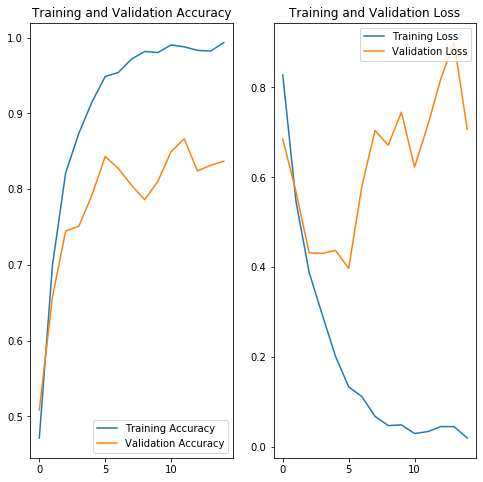

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()